In [13]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

In [56]:
def extract_scores(f, task=None):
    entailment_dict = {
        'None' : 0,
        'Entailment': 1,
        'Paraphrase': 2
    }
    f_tree = ET.parse(f)
    f_root = f_tree.getroot()
    f_list = []
    for pair in f_root.iter('pair'):
        try:
            found_score = float(pair.get(task))
        except:
            found_score = float(entailment_dict[pair.get(task)])
        f_list.append(found_score)
    return f_list

def generate_scores_df(f1=None, f2=None, f1_label='f1_label', f2_label='f2_label', task=None):
    f1_list = extract_scores(f1, task)
    f2_list = extract_scores(f2, task)
    df = pd.DataFrame({f1_label: f1_list, f2_label: f2_list})
    df = df.sort_values(by=[f1_label, f2_label], ascending=[True, True])
    df = df.reset_index()
    df['idx'] = df.index
    df = pd.melt(df, id_vars=['idx'], value_vars=[f1_label, f2_label])
    return df
    
def get_dataplot(dataplot, value_rename, idx_rename, variable_rename, num_samples=500):
    dataplot = dataplot.sample(num_samples)
    dataplot = dataplot.rename(columns={
        "value" : value_rename,
        "idx": idx_rename,
        "variable": variable_rename
    })
    return dataplot

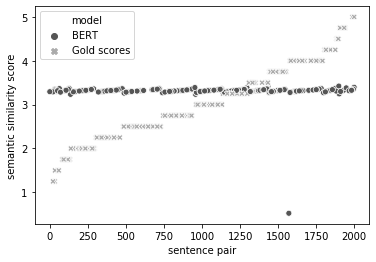

In [62]:
dataplot = generate_scores_df('./sources/assin-ptbr-test.xml', 
                   './generated_submissions/assin1ptbr/submission-roberta.xml', 
                   task='similarity',
                   f1_label="Gold scores",
                   f2_label="BERT")

value_rename = "semantic similarity score"
idx_rename = "sentence pair"
variable_rename = "model"

dataplot = get_dataplot(dataplot, value_rename, idx_rename, variable_rename)

plot1 = sns.scatterplot(x=idx_rename, y=value_rename, hue=variable_rename, data=dataplot, style=variable_rename, palette="gray")

In [59]:
plot1